

<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>




## Interactive Bootstrap Demo

#### Saif Alkaabi
#### Hildebrand Department of Petroleum and Geosystems Engineering, University of Texas at Austin

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Jack Xiao, Graduate Student, The University of Texas at Austin
##### [Twitter](https://twitter.com/jackxiao6) | [LinkedIn](https://www.linkedin.com/in/yuchen-jack-xiao-b1b20876/)


### Executive Summary

This interactive demo is meant as an educational tool to demonstrate bootstrap for subsurface modeling workflows. This tool demonstrates how the bootstrap process works by showing the realizations as they aggregate to form the bootstrap uncertainty. Also shown is the flexibility of bootstrapping to measure uncertainty in any statistic. Bootstrap is a powerful method that can be used to measure uncertainty in subsurface data.

### Import Packages



In [1]:
import geostatspy.GSLIB as GSLIB                        # GSLIB utilites, visualization and wrapper
import geostatspy.geostats as geostats                  # GSLIB methods convert to Python
import os                                               # to set current working directory 
import sys                                              # supress output to screen for interactive variogram modeling
import io
import numpy as np                                      # arrays and matrix math
import pandas as pd                                     # DataFrames
import matplotlib.pyplot as plt                         # plotting
from matplotlib.pyplot import cm                        # color maps
import math                                             # sqrt operator
import random                                           # random simulation locations
from copy import copy                                   # copy a colormap
from ipywidgets import interactive                      # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox
from scipy import stats                                 # summary statistics
from scipy.stats import norm                            # Gaussian distribution
import scipy.stats as st                                # statistical methods
from IPython.display import display, clear_output
from matplotlib.offsetbox import AnchoredText

### Functions

The following function will be used in the workflow.



In [2]:
def f_make(real_max_,ndata_, real_no_, tdata_, tstat_, debias_): # function to take parameters, make interactive widget
    global ymi
    global yma
    global xmin
    global xmax
    global Demo
    text_trap = io.StringIO()                           # suppress all text function output to dashboard to avoid clutter 
    sys.stdout = text_trap
    cmap = cm.inferno
    np.random.seed(seed = 73072)                        # ensure same results for all runs
    random.seed(73072)
    
    for f in np.arange(len(feature)):
        unit[columns[f][0]] = feature[f].value
    
    np.random.seed(seed = 73072)                        # reset number seed to ensure same sequence
    data = np.random.choice(tdata_, size=int(len(df)*ndata_))
    np.random.seed(seed = 73072)
    
    if debias_ == 'On':
        wts_df = df['Wts']
    else:
        wts_df = df['Wts_no']
    weights = np.random.choice(wts_df, size=int(len(df)*ndata_))
    
    if real_no_ > real_max_:
        clear_output()
        real_no_ = real_max_
        real_no.max = real_max_
        Demo
        plt.show()
        
        
    if real_no.max < real_max_:
        real_no.max = real_max_
        real_no.max = real_max.value
        #real_no.value = real_no.max
        Demo
        clear_output()
    
    if real_no.max > real_max_:
        real_no.max = real_max_
        real_no.max = real_max.value
        Demo
        clear_output()
        
    L = real_max_                                       # set the number of realizations for uncertainty calculation
    mean = np.zeros(L); stdev = np.zeros(L)             # declare arrays to hold the realizations of the statistics
    P10 = np.zeros(L)                          
    P50 = np.zeros(L); P90 = np.zeros(L)
    samples = np.zeros((real_max_,len(data)))
    for l in range(0, L):                               # loop over realizations
        samples[l]  = random.choices(data, weights=weights, cum_weights=None, k=len(data))
        mean[l] = np.average(samples[l])
        stdev[l] = np.std(samples[l])
        P10[l] = np.percentile(q = 10, a = samples[l])
        P50[l] = np.percentile(q = 50, a = samples[l])
        P90[l] = np.percentile(q = 90, a = samples[l])
    stat_data = [mean, stdev, P10, P50, P90]
    
    plt.subplot(121)
    GSLIB.hist_st(stat_data[tstat_][:real_no_],min(stat_data[tstat_]),max(stat_data[tstat_]),False,False,20,None,tstat.label + ', ' + tdata.label + ' (' + unit[tdata.label] +')','Bootstrap Uncertainty in ' + tdata.label + ' ' + tstat.label)
    GSLIB.hist_st(stat_data[tstat_],min(stat_data[tstat_]),max(stat_data[tstat_]),False,False,20,None,tstat.label + ', ' + tdata.label + ' (' + unit[tdata.label] +')','Bootstrap Uncertainty in ' + tdata.label + ' ' + tstat.label)
    
    if real_max_ == realizations:
        ymi, yma = plt.gca().get_ylim()
        xmin, xmax = plt.gca().get_xlim()  
    
    ymi2, yma2 = plt.gca().get_ylim()  
    
    plt.ylim((ymi, yma))
    plt.xlim((xmin, xmax))
    plt.plot([stat_data[tstat_][real_no.value-1], stat_data[tstat_][real_no.value-1]], [0, 0.9*yma], 'k')
    plt.text(stat_data[tstat_][real_no.value-1], 0.9*yma, tstat.label + ' = ' + str(np.around(stat_data[tstat_][real_no.value-1], 3)) + ' (' + unit[tdata.label] + ')', bbox=dict(boxstyle = "square", facecolor = "white"), fontsize=12)
    
    plt.subplot(122)
    GSLIB.hist_st(samples[real_no.value-1],min(data),max(data),False,False,20,None, tdata.label + ' (' + unit[tdata.label] +')','Bootstrap ' + tdata.label + ' Realization ' + str(real_no_))
    ymin, ymax = plt.gca().get_ylim()
    plt.plot([stat_data[tstat_][real_no.value-1], stat_data[tstat_][real_no.value-1]], [0, 0.9*ymax], 'k')
    plt.text(1.017*stat_data[tstat_][real_no.value-1], 0.9*ymax, tstat.label + ' = ' + str(np.around(stat_data[tstat_][real_no.value-1], 3)) + ' (' + unit[tdata.label] + ')', bbox=dict(boxstyle = "square", facecolor = "white"), fontsize=12)
    
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)  

### Load Data

The following workflow applies the .csv file 'sample_data_biased.csv' from PGE 383 datasets. However, the interactive tool accepts other datasets as well. 

We will work with the following features:

* **porosity** - void fraction in rock
* **permeability** - ability of a fluid to flow through the rock in millidarcy (mD)


Set the working directory using the following command:

In [3]:
os.chdir("C:\Users\Xerqe\Dropbox\UT\Subsurface ML\Project\Reference")                     # set the working directory

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-3-93285882d9f0>, line 1)

Load the comma delimited file into a Pandas' DataFrame object:

In [4]:
df = pd.read_csv('PGE383_Project_Saif_Alkaabi_data.csv')                                  # load our data table 

### Basic Data Checking and Visualization

We can check the summary statistics of the data to understand what we are using:


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,289.0,475.813149,254.277530,0.000000,300.000000,430.000000,670.000000,990.000000
Y,289.0,529.692042,300.895374,9.000000,269.000000,549.000000,819.000000,999.000000
Facies,289.0,0.813149,0.390468,0.000000,1.000000,1.000000,1.000000,1.000000
Porosity,289.0,0.134744,0.037745,0.058548,0.106318,0.126167,0.154220,0.228790
Perm,289.0,207.832368,559.359350,0.075819,3.634086,14.908970,71.454424,5308.842566


Get the range of the data from the summary statistics above:

In [6]:
xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values
pormin = 0.05; pormax = 0.25;           # range of porosity values
permmin = 0.0; permmax = 5500           # range of permeability values
nx = 100; ny = 100; csize = 10.0  

Visualize the spatial dataset:

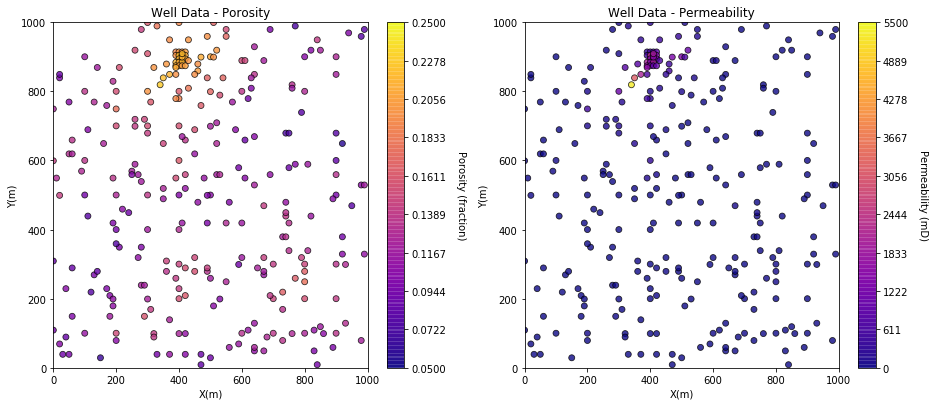

In [7]:
cmap = plt.cm.plasma 

plt.subplot(121)
GSLIB.locmap_st(df,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)

plt.subplot(122)
GSLIB.locmap_st(df,'X','Y','Perm',xmin,xmax,ymin,ymax,permmin,permmax,'Well Data - Permeability','X(m)','Y(m)','Permeability (mD)',cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

As we can see, the data is biased as the samples are concentrated towards one region with favorable porosity and permeability. It is essential to debias the data to avoid bias in the uncertainty model. In this workflow, we will apply cell-based declustering to give weights to the data points.

In [8]:
wts, cell_sizes, dmeans = geostats.declus(df,'X','Y','Porosity',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df['Wts'] = wts
df.head()

There are 289 data with:
   mean of      0.13474387540138408 
   min and max  0.058547873 and 0.228790002
   standard dev 0.03767982164385207 


,X,Y,Facies,Porosity,Perm,Wts
0,100,900,1,0.115359,5.736104,3.064286
1,100,800,1,0.136425,17.211462,1.076608
2,100,600,1,0.135810,43.724752,0.997239
3,100,500,0,0.094414,1.609942,1.165119
4,100,100,0,0.113049,10.886001,1.224164


### Interactive Bootstrap Demo

This tool is flexible and is able to accept other datasets. 

* **Note:** It will conduct cell-based declustering automatically as long as 'X' , 'Y', and 'Porosity' data are available. Otherwise, it will assign nominal weights to the data.



### 1. Load Alternative Dataset (Optional)

It is possible to use other datasets for this bootstrap demo. Use the upload widget to select the file directly:



In [9]:
uploader = widgets.FileUpload(accept = '.csv')
display(uploader)

FileUpload(value={}, accept='.csv', description='Upload')

After uploading the file, extract it and convert it into a Pandas' Dataframe:

In [10]:
uploaded_file = uploader.value
[file_name] = uploader.value
df = pd.read_csv(io.BytesIO(uploaded_file[file_name]['content']))

ValueError: not enough values to unpack (expected 1, got 0)

Check the summary statistics of the data:

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,289.0,475.813149,254.277530,0.000000,300.000000,430.000000,670.000000,990.000000
Y,289.0,529.692042,300.895374,9.000000,269.000000,549.000000,819.000000,999.000000
Facies,289.0,0.813149,0.390468,0.000000,1.000000,1.000000,1.000000,1.000000
Porosity,289.0,0.134744,0.037745,0.058548,0.106318,0.126167,0.154220,0.228790
Perm,289.0,207.832368,559.359350,0.075819,3.634086,14.908970,71.454424,5308.842566
Wts,289.0,1.000000,0.639743,0.281976,0.670642,0.789486,1.174123,3.984325


### 2. Input Units

Indicate units for the data used. These units will be automatically integrated into the interactive tool display. By default, units for features in 'PGE383_Project_Saif_Alkaabi_data.csv' are applied.



In [12]:
if 'Por' in df.columns:
    df = df.rename(columns={'Por': 'Porosity'})

if 'Porosity'in df.columns:
    if 'X' in df.columns:
        if 'Y' in df.columns:
            wts, cell_sizes, dmeans = geostats.declus(df,'X','Y','Porosity',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
    df['Wts'] = wts                           # add weights to the sample data DataFrame
else:
    df['Wts'] = np.ones((len(df)))

df['Wts_no'] = np.ones((len(df)))

columns = []
for l in range(len(df.columns)-2):
    columns.append((df.columns[l], df.iloc[:, l].tolist()))
    
feature=[]
unit = dict()
n = 0
for col in columns:
    feature.append(widgets.Text(
        value='',
        placeholder='Type unit',
        description= col[0] + ':',
        disabled=False
))
    
    if col[0] == 'X':
        feature[n].value = 'km'
    if col[0] == 'Y':
        feature[n].value = 'km'
    if col[0] == 'Porosity':
        feature[n].value = 'fraction'
    if col[0] == 'Perm':
        feature[n].value = 'mD'
    display(feature[n])
    
    unit[col[0]] = ''
    n = n + 1

for f in np.arange(len(feature)):
    unit[columns[f][0]] = feature[f].value

There are 289 data with:
   mean of      0.13474387540138408 
   min and max  0.058547873 and 0.228790002
   standard dev 0.03767982164385207 


Text(value='km', description='X:', placeholder='Type unit')

Text(value='km', description='Y:', placeholder='Type unit')

Text(value='', description='Facies:', placeholder='Type unit')

Text(value='fraction', description='Porosity:', placeholder='Type unit')

Text(value='mD', description='Perm:', placeholder='Type unit')

### 3. Display the Interactive Tool

The following code will display the interactive tool with automated updating of the graphics.

In [13]:
import warnings; warnings.simplefilter('ignore')

realizations = 1000
interactive_plot = []

stat = [('Average', 0), ('Standard Deviation', 1), ('P10', 2), ('P50', 3), ('P90', 4)]
style = {'description_width': 'initial'}
l = widgets.Text(value='                                                                                                       Bootstrap Interactive Demo',layout=Layout(width='950px', height='30px'))
real_max = widgets.IntSlider(min = 100, max = realizations, value = realizations, step = 100, description = 'Realizations',orientation='horizontal',continuous_update=True,
                          layout=Layout(width='300px', height='40px'))
real_max.style.handle_color = 'gray'

tstat = widgets.Dropdown(options=stat, value=0, description='Statistic:',)

tdata = widgets.Dropdown(options=columns, value=columns[0][1], description='Data:',)

ndata = widgets.FloatSlider(min = 0.1, max = 1.0, value = 1, step = 0.1, description = 'Data%',orientation='horizontal',continuous_update=True,
                          layout=Layout(width='300px', height='40px'))
ndata.style.handle_color = 'gray'

real_no = widgets.IntSlider(min = 1, max = real_max.value, value = 1, step = 1, description = 'Real. #',orientation='horizontal',continuous_update=True,
                          layout=Layout(width='300px', height='40px'))
real_no.style.handle_color = 'gray'

debias = widgets.ToggleButtons(options=['On', 'Off'],description='Debiasing',disabled=False,button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Spatial debiasing using cell-based declustering. "X", "Y", and "Porosity" data required. If not available, nominal weights are given and the data is not debiased.', 'No debiasing. Assumes samples are representative.'],)

uipars1 = widgets.HBox([tdata,tstat, debias],)

uipars2 = widgets.HBox([real_max,ndata, real_no],)     

uik = widgets.VBox([l, uipars1, uipars2],)
    
# connect the function to make the samples and plot to the widgets    
interactive_plot = widgets.interactive_output(f_make, {'real_max_':real_max,'ndata_':ndata, 'real_no_':real_no, 'tdata_':tdata, 'tstat_':tstat, 'debias_': debias})
#interactive_plot.clear_output(wait = True)               # reduce flickering by delaying plot updating

Demo = display(uik, interactive_plot)                            # display the interactive plot


Output()

#### Observations:

* When adjusting the number of realizations, we notice that the shape of the histogram (left plot) becomes more defined (i.e. less flat) at larger realizations. As we increase the number of realizations, the general shape of the histogram tends to stabilize. This is an indication of reaching a **sufficient number of realizations**. 


* When reducing the percentage of data used, we are introducing uncertainty into the data. This distorts the shape of the histogram and makes it relatively less defined (i.e. flatter). In some cases, the histogram becomes skewed. This shows **implications of sparse sampling** on uncertainty.


* Spatial bias can heavily impact uncertainty calculations. The shape of the histogram can be completely altered when turning on and off spatial debiasing. It is **necessary to debias the data** and ensure the data is representative.


* Bootstrap is a **powerful, flexible method** that can calculate uncertainty in various statistics for various parameters.


### Parting Comments



I hope this was helpful,

Saif Alkaabi

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
